In [1]:
from data_provider.data_loader import HuaweiDataset

dataset = HuaweiDataset(path="/home/user/suzhao/BehaviorDL/dataset/Huawei", label_flag='emotion')

In [2]:
len(dataset)

840

In [3]:
df = dataset.all_df[['emotion', 'energy']]

In [4]:
df['id'] = df.index
df.reset_index(drop=True, inplace=True)
df

,emotion,energy,id
0,2.0,7.0,0
1,2.0,7.0,0
2,2.0,7.0,0
3,2.0,7.0,0
4,2.0,7.0,0
...,...,...,...
1210435,1.0,7.0,839
1210436,1.0,7.0,839
1210437,1.0,7.0,839
1210438,1.0,7.0,839


In [5]:
df.drop_duplicates(subset=['emotion', 'energy', 'id'], keep='first', inplace=True)

In [6]:
df.reset_index(drop=True, inplace=True)
df = df.query('energy < 3 or energy > 5')

<Axes: xlabel='id', ylabel='energy'>

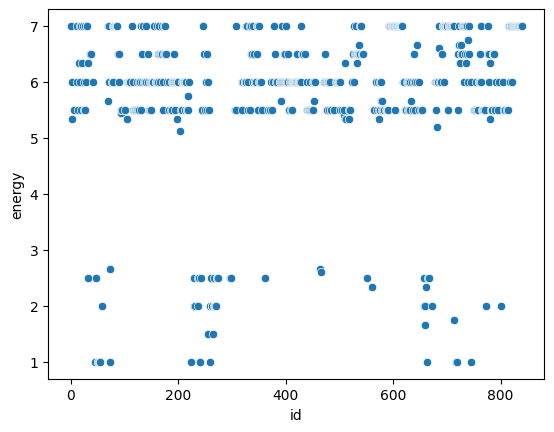

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x='id', y='energy', data=df)

<Axes: xlabel='id', ylabel='emotion'>

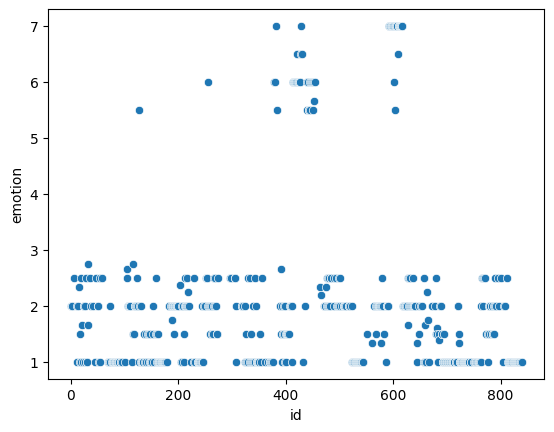

In [8]:
sns.scatterplot(x='id', y='emotion', data=df)


<Axes: xlabel='emotion', ylabel='energy'>

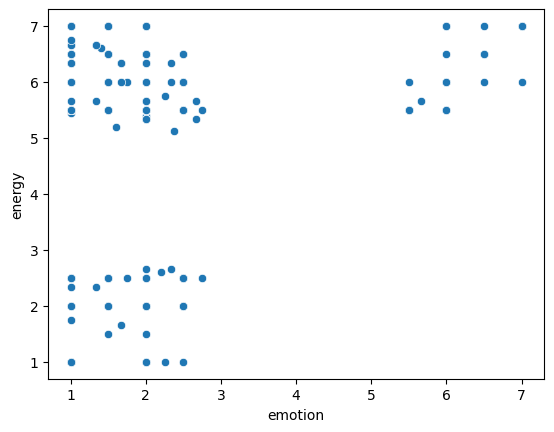

In [9]:
sns.scatterplot(x='emotion', y='energy', data=df)